Start by importing the needed libraries

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set()

Read in the data with pandas

In [28]:
data = pd.read_csv("data/drivingTimes.csv")
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time
data.head()

,date,day_of_the_week,time,time_of_day,olney_secs,college_park_secs,olney_mins,college_park_mins,olney_hours,college_park_hours
0,11/13/2019,Wednesday,06:00:00,Morning,2398,2405,39.966667,40.083333,0.666111,0.668056
1,11/13/2019,Wednesday,06:20:00,Morning,2555,2689,42.583333,44.816667,0.709722,0.746944
2,11/13/2019,Wednesday,06:40:00,Morning,2850,2774,47.500000,46.233333,0.791667,0.770556
3,11/13/2019,Wednesday,07:00:00,Morning,3217,3217,53.616667,53.616667,0.893611,0.893611
4,11/13/2019,Wednesday,07:20:00,Morning,3127,3167,52.116667,52.783333,0.868611,0.879722


## Commuting from Olney

Creating a dataset with just Olney time

In [29]:
data_olney = data.loc[:,["date", "day_of_the_week", 'time', 'time_of_day', 'olney_secs', 'olney_mins', 'olney_hours']]
data_olney.head()

,date,day_of_the_week,time,time_of_day,olney_secs,olney_mins,olney_hours
0,11/13/2019,Wednesday,06:00:00,Morning,2398,39.966667,0.666111
1,11/13/2019,Wednesday,06:20:00,Morning,2555,42.583333,0.709722
2,11/13/2019,Wednesday,06:40:00,Morning,2850,47.500000,0.791667
3,11/13/2019,Wednesday,07:00:00,Morning,3217,53.616667,0.893611
4,11/13/2019,Wednesday,07:20:00,Morning,3127,52.116667,0.868611


### Average Times

**What is the average time communting from Olney?**

In [30]:
data_olney.loc[:,["olney_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins
time_of_day,
Evening,68.012682
Morning,51.975720


**What is the average time in the morning if I leave at 7?**

In [31]:
data_olney.loc[data_olney['time'] == datetime.strptime("7:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    51.814167
dtype: float64

**What is the average time in the evening if I leave at 4?**

In [32]:
data_olney.loc[data_olney['time'] == datetime.strptime("16:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    74.975833
dtype: float64

**What is the best time to go to work in the morning?**

In [33]:
avg_morning_time = data.loc[data_olney['time_of_day'] == "Morning"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_morning_time)
avg_morning_time.loc[avg_morning_time['olney_mins'].idxmin()]

,olney_mins
time,
06:00:00,40.771667
06:20:00,43.715000
06:40:00,46.650000
07:00:00,51.814167
07:20:00,56.075000
07:40:00,60.053333
08:00:00,60.811667
08:20:00,58.910000
08:40:00,55.101667


olney_mins    40.771667
Name: 06:00:00, dtype: float64

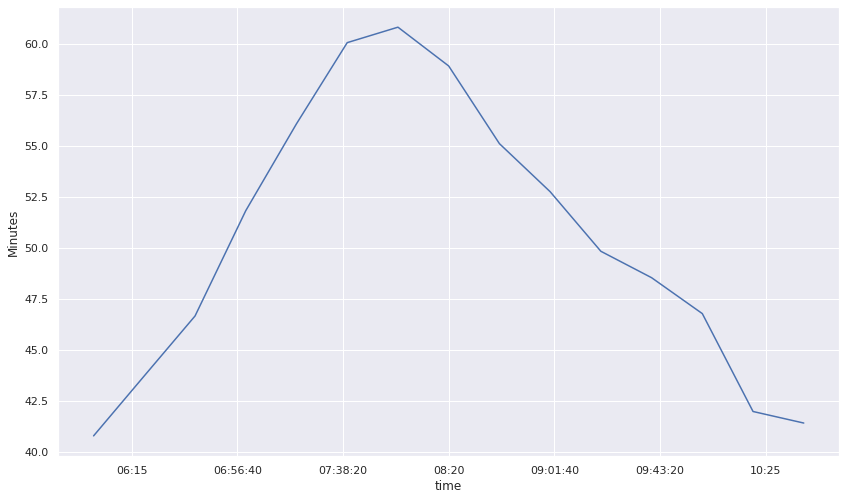

In [34]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_morning_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What is the best time to go home?**

In [35]:
avg_evening_time = data.loc[data_olney['time_of_day'] == "Evening"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_evening_time)
avg_evening_time.loc[avg_evening_time['olney_mins'].idxmin()]

,olney_mins
time,
15:00:00,63.425000
15:20:00,67.517500
15:40:00,71.570000
16:00:00,74.975833
16:20:00,76.866667
16:40:00,77.230000
17:00:00,78.109167
17:20:00,77.940833
17:40:00,76.262500


olney_mins    47.187719
Name: 19:40:00, dtype: float64

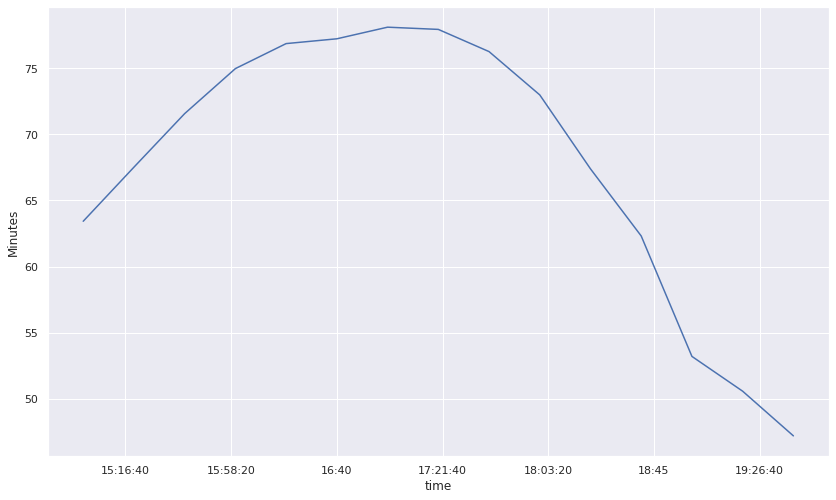

In [36]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_evening_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

### Comparing the days of the week

In [37]:
data_olney_dow = data_olney.loc[:,["olney_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean().reset_index()

**What are the averages for the morning?**

In [38]:
data_olney_dow_morning = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Morning"]
data_olney_dow_morning.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
4,Monday,50.439722
5,Thursday,51.408056
6,Tuesday,54.224722
7,Wednesday,51.837302


**What is the quickest day of the week to get to work?**

In [39]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmin()]

time_of_day        Morning
day_of_the_week     Monday
olney_mins         50.4397
Name: 4, dtype: object

**What is the longest day of the week to go to work?**

In [40]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmax()]

time_of_day        Morning
day_of_the_week    Tuesday
olney_mins         54.2247
Name: 6, dtype: object

Morning time comparision

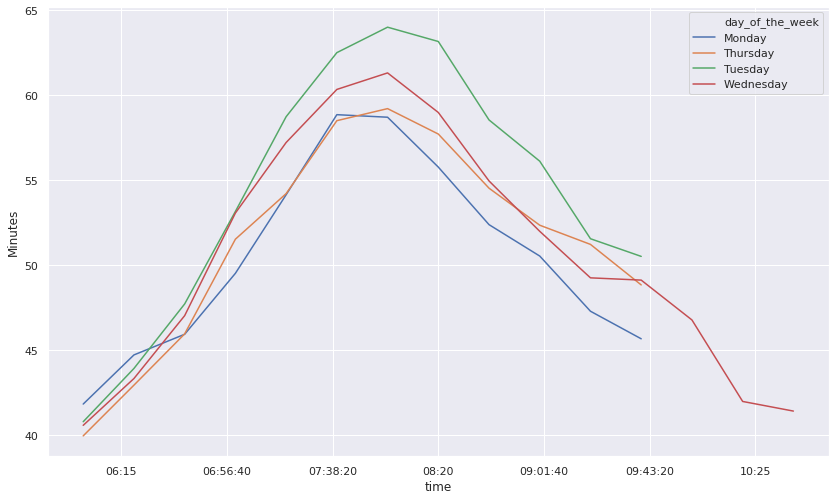

In [41]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Morning"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What are the averages for the evening?**

In [42]:
data_olney_dow_evening = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Evening"]
data_olney_dow_evening.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
0,Monday,62.694889
1,Thursday,67.534222
2,Tuesday,74.059722
3,Wednesday,68.003778


**What is the quickest day of the week to get to home?**

In [43]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmin()]

time_of_day        Evening
day_of_the_week     Monday
olney_mins         62.6949
Name: 0, dtype: object

**What is the longest day of the week to go to home?**

In [44]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmax()]

time_of_day        Evening
day_of_the_week    Tuesday
olney_mins         74.0597
Name: 2, dtype: object

Evening time comparision

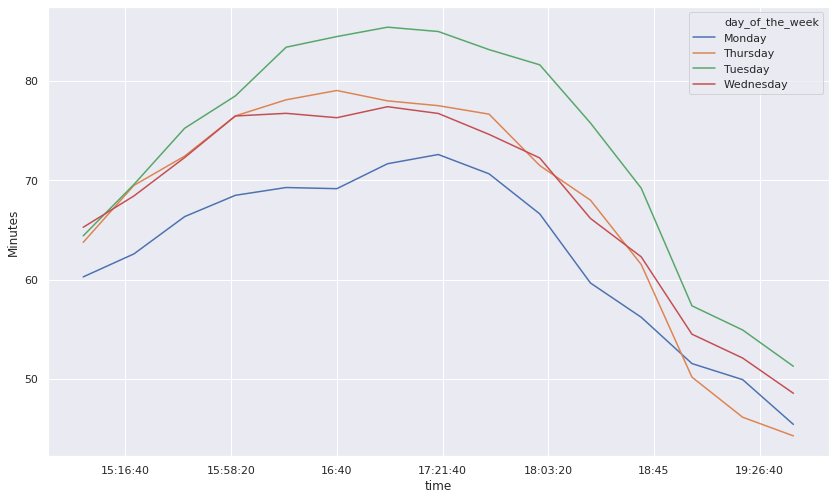

In [45]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Evening"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

## Comparing the two

First, we will look at some overall averages

In [46]:
data.loc[:,["olney_mins", "college_park_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins,college_park_mins
time_of_day,,
Evening,68.012682,65.347194
Morning,51.975720,48.324005


The averages by the day of the week

In [47]:
day_week_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean()
display(day_week_mean) 
day_week_mean = day_week_mean.reset_index()

olney_mins  college_park_mins
time_of_day day_of_the_week                               
Evening     Monday            62.694889          59.855556
            Thursday          67.534222          65.044667
            Tuesday           74.059722          71.846065
            Wednesday         68.003778          64.902444
Morning     Monday            50.439722          47.330278
            Thursday          51.408056          46.444444
            Tuesday           54.224722          51.296111
            Wednesday         51.837302          48.229894

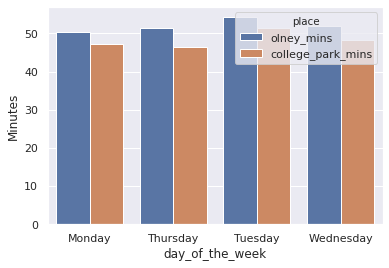

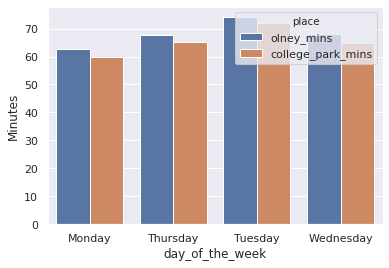

In [48]:
day_week_mean_morning = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_morning, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_week_mean_evening = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_evening, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

The averages by time

In [49]:
day_time_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'time']].groupby(['time_of_day', 'time']).mean()
display(day_time_mean) 
day_time_mean = day_time_mean.reset_index()

olney_mins  college_park_mins
time_of_day time                                   
Evening     15:00:00   63.425000          63.090000
            15:20:00   67.517500          68.665833
            15:40:00   71.570000          70.632500
            16:00:00   74.975833          73.676667
            16:20:00   76.866667          75.427500
            16:40:00   77.230000          75.015000
            17:00:00   78.109167          76.835000
            17:20:00   77.940833          77.031667
            17:40:00   76.262500          75.576667
            18:00:00   72.985000          70.552500
            18:20:00   67.390000          63.963333
            18:40:00   62.310000          58.940000
            19:00:00   53.199123          46.451754
            19:20:00   50.566667          42.187719
            19:40:00   47.187719          38.728070
Morning     06:00:00   40.771667          39.937500
            06:20:00   43.715000          42.986667
            06:40:00   46.650000          45.149167
            07:00:00   51.814167          49.122500
            07:20:00   56.075000          53.181667
            07:40:00   60.053333          53.368333
            08:00:00   60.811667          54.694167
            08:20:00   58.910000          54.032500
            08:40:00   55.101667          52.602500
            09:00:00   52.745000          49.074167
            09:20:00   49.823333          44.832500
            09:40:00   48.527500          41.774167
            10:00:00   46.766667          45.900000
            10:20:00   41.966667          42.533333
            10:40:00   41.400000          39.183333

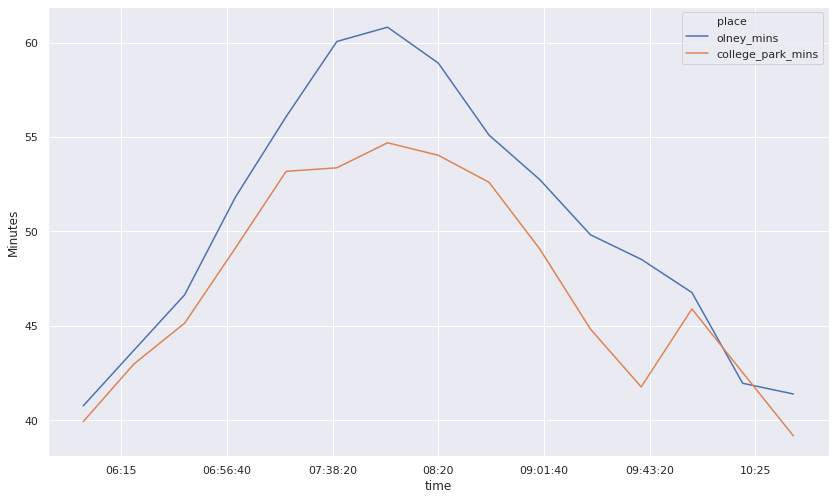

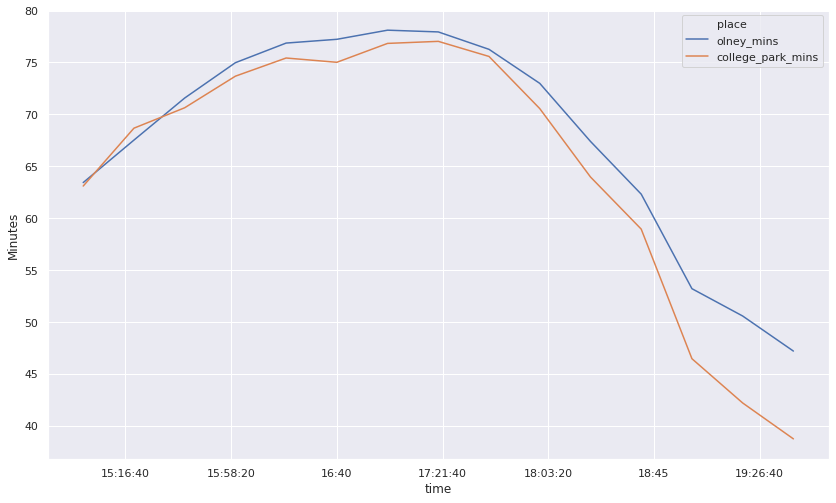

In [50]:
day_time_mean_morning = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")

fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_morning, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_time_mean_evening = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_evening, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()